In [1]:
import mne
import matplotlib.pyplot as plt
import numpy as np
import MY_bcilib as mybci

In [2]:
'''
read_raw_filename = 'data/B0101T.gdf'
save_epo_filename = 'data/B0101T_epo.fif'

raw = mne.io.read_raw_gdf(read_raw_filename, preload=True)

raw.drop_channels(['EOG:ch01','EOG:ch02','EOG:ch03'])

# 768 --- start a trial
custom_mapping = {'769':3,'770':4}
(events_from_annot,event_dict) = mne.events_from_annotations(raw, event_id=custom_mapping)
#  3s开始为时间cue
raw_epochs = mne.Epochs(raw, events=events_from_annot, event_id=event_dict,proj=True,baseline=(None, 0), preload=True,tmin=-2,tmax=6)

evoked = raw_epochs.average()
evoked.plot(time_unit='s')

raw_epochs.save(save_epo_filename)
'''

"\nread_raw_filename = 'data/B0101T.gdf'\nsave_epo_filename = 'data/B0101T_epo.fif'\n\nraw = mne.io.read_raw_gdf(read_raw_filename, preload=True)\n\nraw.drop_channels(['EOG:ch01','EOG:ch02','EOG:ch03'])\n\n# 768 --- start a trial\ncustom_mapping = {'769':3,'770':4}\n(events_from_annot,event_dict) = mne.events_from_annotations(raw, event_id=custom_mapping)\n#  3s开始为时间cue\nraw_epochs = mne.Epochs(raw, events=events_from_annot, event_id=event_dict,proj=True,baseline=(None, 0), preload=True,tmin=-2,tmax=6)\n\nevoked = raw_epochs.average()\nevoked.plot(time_unit='s')\n\nraw_epochs.save(save_epo_filename)\n"

In [38]:
from scipy.io import loadmat

filename1 = 'data/B0' + str(2) +'05E.mat'

raw_label_data = loadmat(filename1)
train_label = raw_label_data['classlabel'] - 1

train_label = train_label.reshape(train_label.shape[0],)
print(train_label.shape)

(160,)


设置被试号

In [4]:
subject = 5

In [5]:
'''
Train epoch 
——————————————————————————————————
1 : 400 
2 : 400
3 : 400
4 : 420 
5 : 420
6 : 400 
7 : 400
8 : 440
9 : 400

Test epoch 
——————————————————————————————————
1 : 320
2 : 280
3 : 320
4 : 320 
5 : 320
6 : 320 
7 : 320
8 : 320
9 : 320

'''
all_epoch_num = 420  #训练集共400个epoch
all_test_epoch_num = 320   # 共320个epoch

训练集数据与标签读取

In [6]:
time_start = 2.5
time_end = 6
time_points = 876
train_data_r = np.zeros((all_epoch_num,3,time_points))  

epo_cnt = 0

for i in range(3):
    filename = 'data/B0' + str(subject) + '0'+ str( i + 1) +'T_epo.fif'
    epochs = mne.read_epochs(filename)

    epochs_crop = epochs.crop(time_start,time_end)

    data = epochs_crop.get_data()

    for i in range(data.shape[0]):
        train_data_r[epo_cnt,:,:] = data[i,:,:]
        epo_cnt += 1



Reading e:\19_BCIexperiment\02_CodeTest\MNE_TEST\data\B0501T_epo.fif ...
Isotrak not found
    Found the data of interest:
        t =    -500.00 ...    7000.00 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated
Reading e:\19_BCIexperiment\02_CodeTest\MNE_TEST\data\B0502T_epo.fif ...
Isotrak not found
    Found the data of interest:
        t =    -500.00 ...    7000.00 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
140 matching events found
No baseline correction applied
0 projection items activated
Reading e:\19_BCIexperiment\02_CodeTest\MNE_TEST\data\B0503T_epo.fif ...
Isotrak not found
    Found the data of interest:
        t =    -500.00 ...    7000.00 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
160 matching events found
No baseline correction applied
0 projection it

In [7]:
train_data_r.shape

(420, 3, 876)

In [8]:
train_label_r = np.zeros((all_epoch_num,1))

cnt = 0
for i in range(3):
    filename = 'data/B0' + str(subject) + '0'+ str( i + 1) +'T.mat'
    raw_label_data = loadmat(filename)
    print( raw_label_data['classlabel'].shape)
    train_label_r[cnt:cnt+len(raw_label_data['classlabel']),:] = raw_label_data['classlabel'] - 1 
    cnt += len(raw_label_data['classlabel'])
    print(cnt)

(120, 1)
120
(140, 1)
260
(160, 1)
420


In [9]:
train_label_r = train_label_r.reshape(train_label_r.shape[0],)

In [10]:
train_label =  train_label_r

In [11]:
print('train_label_r shape : ',train_label_r.shape)
print('train_data_r shape : ',train_data_r.shape)

train_label_r shape :  (420,)
train_data_r shape :  (420, 3, 876)


测试集数据与标签读取

In [12]:
test_data_r = np.zeros((all_test_epoch_num,3,time_points))  

epo_cnt = 0

for i in range(2):
    filename = 'data/B0' + str(subject) + '0'+ str( i + 4) +'E_epo.fif'
    epochs = mne.read_epochs(filename)

    epochs_crop = epochs.crop(time_start,time_end)

    data = epochs_crop.get_data()

    for i in range(data.shape[0]):
        test_data_r[epo_cnt,:,:] = data[i,:,:]
        epo_cnt += 1

Reading e:\19_BCIexperiment\02_CodeTest\MNE_TEST\data\B0504E_epo.fif ...
Isotrak not found
    Found the data of interest:
        t =    -500.00 ...    7000.00 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
160 matching events found
No baseline correction applied
0 projection items activated
Reading e:\19_BCIexperiment\02_CodeTest\MNE_TEST\data\B0505E_epo.fif ...
Isotrak not found
    Found the data of interest:
        t =    -500.00 ...    7000.00 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
160 matching events found
No baseline correction applied
0 projection items activated


In [13]:
test_label_r = np.zeros((all_test_epoch_num,1))

cnt = 0
for i in range(2):
    filename = 'data/B0' + str(subject) + '0'+ str( i + 4) +'E.mat'
    raw_label_data = loadmat(filename)
    print( raw_label_data['classlabel'].shape)
    test_label_r[cnt:cnt+len(raw_label_data['classlabel']),:] = raw_label_data['classlabel'] - 1 
    cnt += len(raw_label_data['classlabel'])
    print(cnt)

(160, 1)
160
(160, 1)
320


In [14]:
test_label_r = test_label_r.reshape(test_label_r.shape[0],)

test_label =  test_label_r

In [15]:
print('test_label_r shape : ',test_label_r.shape)
print('test_data_r shape : ',test_data_r.shape)

test_label_r shape :  (320,)
test_data_r shape :  (320, 3, 876)


数据预处理，带通滤波  8-35hz

In [16]:
train_data = mybci.band_pass(train_data_r,8,32,sample_rate=250)
test_data = mybci.band_pass(test_data_r,8,32,sample_rate=250)

trials_filter shape  (420, 3, 876)
trials_filter shape  (320, 3, 876)


In [17]:
train_psd,freq = mybci.psd(train_data,500,250)


In [18]:
test_psd,freq = mybci.psd(test_data,500,250)

In [19]:
train_psd.shape

(420, 3, 251)

In [20]:
left_psd = train_psd[train_label==0,:,:]
right_psd = train_psd[train_label==1,:,:]

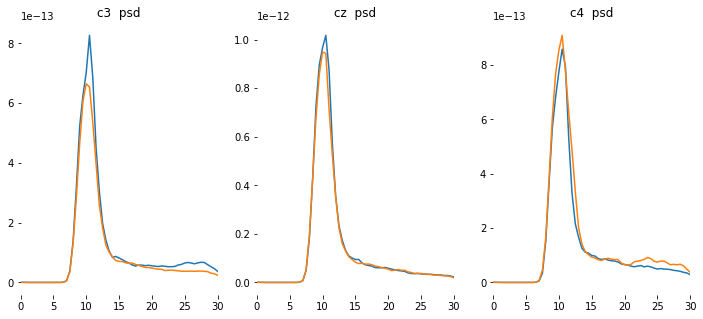

In [21]:
mybci.plot_psd(train_psd[train_label==0,:,:],train_psd[train_label==1,:,:],freq,['c3','cz','c4'],[0,1,2])


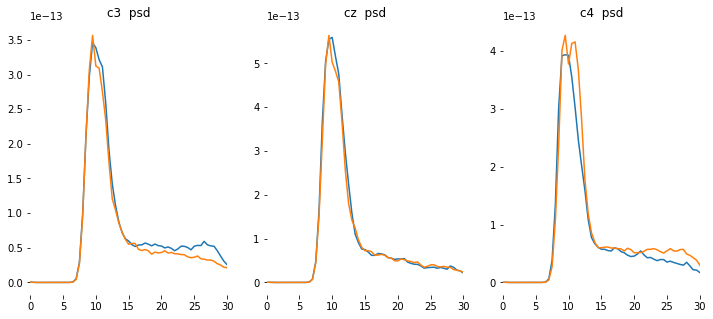

In [22]:
mybci.plot_psd(test_psd[test_label==0,:,:],test_psd[test_label==1,:,:],freq,['c3','cz','c4'],[0,1,2])

In [23]:
left_psd_var = mybci.logvar(left_psd)
right_psd_var = mybci.logvar(right_psd)

(3,)
(3,)


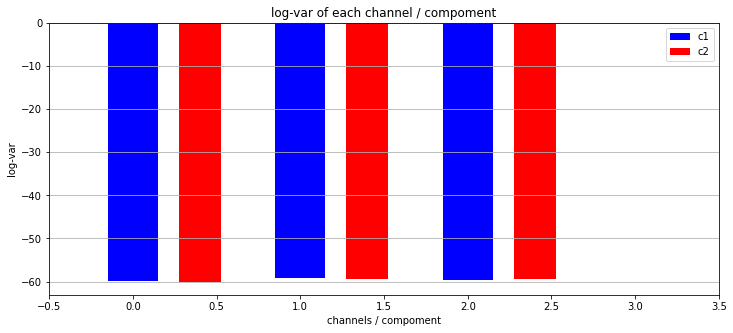

In [24]:
mybci.plot_logvar(left_psd_var,right_psd_var)

计算CSP投影矩阵W

In [25]:
psd_W = mybci.cal_W(left_psd,right_psd)

两类的特征值lambda:
 [0.59813539 0.49761511 0.32135409]
Sb value is  [[ 0.47588167  0.10077217  0.01919892]
 [ 0.10077217  0.61784236 -0.05439471]
 [ 0.01919892 -0.05439471  0.48917138]]
reverse Sb value is  [[ 0.47588167  0.10077217  0.01919892]
 [ 0.10077217  0.61784236 -0.05439471]
 [ 0.01919892 -0.05439471  0.48917138]]
------------------------


In [26]:
left_psd_csp = mybci.apply_mix(psd_W,left_psd)
right_psd_csp = mybci.apply_mix(psd_W,right_psd)

In [27]:
left_psd_csp_var = np.var(left_psd_csp,axis=2)
right_psd_csp_var = np.var(right_psd_csp,axis=2)

(3,)
(3,)


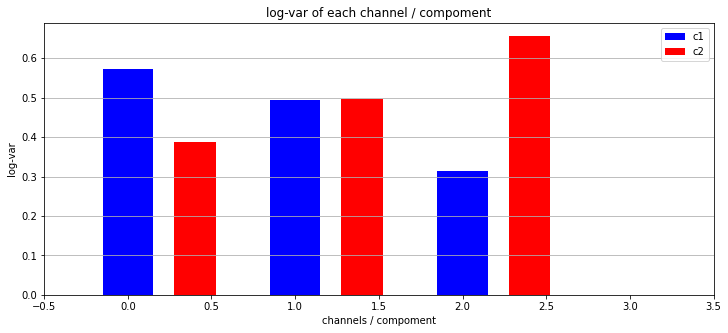

In [28]:
mybci.plot_logvar(left_psd_csp_var,right_psd_csp_var)

In [29]:
_ , left_psd_csp_feat = mybci.cal_csp_feature(left_psd_csp_var,[0,1,-1])
_ , right_psd_csp_feat = mybci.cal_csp_feature(right_psd_csp_var,[0,1,-1])

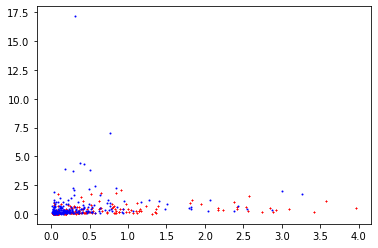

In [30]:

plt.scatter(left_psd_csp_var[:,0],left_psd_csp_var[:,2],c='r',marker='x',s=1)
plt.scatter(right_psd_csp_var[:,0],right_psd_csp_var[:,2],c='b',marker='o',s=1)


In [31]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from skfeature.function.statistical_based import f_score
from sklearn.preprocessing import StandardScaler

In [32]:
def TDF_feature(data,csp_W):
    TDF_mean = np.mean(data,axis=2)
    TDF_mean = TDF_mean[:,[0,-1]]

    TDF_std = np.std(data,axis=2)
    TDF_std = TDF_mean[:,[0,-1]]

    TDF_max = np.max(data,axis=2)
    TDF_max = TDF_max[:,[0,2]]

    TDF_min = np.min(data,axis=2)
    TDF_min = TDF_min[:,[0,-1]]

    train_csp_var = np.var(mybci.apply_mix(csp_W,data),axis=2)
    _,train_csp_feat = mybci.cal_csp_feature(train_csp_var,[0,-1])

    train_csp_feat_conb = np.concatenate((TDF_mean,TDF_std),axis=1)
    train_csp_feat_conb = np.concatenate((train_csp_feat_conb,TDF_max),axis=1)
    train_csp_feat_conb = np.concatenate((train_csp_feat_conb,TDF_min),axis=1)
    train_csp_feat_conb = np.concatenate((train_csp_feat_conb,train_csp_feat),axis=1)

    return train_csp_feat_conb


In [33]:
train_csp_feat_conb = TDF_feature(train_psd,psd_W)

In [34]:
scaler = StandardScaler()
scaler.fit(train_csp_feat_conb,train_label)
train_csp = scaler.transform(train_csp_feat_conb)

clf = SVC(gamma='auto')  #

clf.fit(train_csp,train_label)



acc = 1 - (np.sum(abs(clf.predict(train_csp) - train_label)) / train_csp.shape[0])
print('acc is : ',acc)

acc is :  0.7166666666666667


测试集预测

In [35]:
test_csp_feat_conb = TDF_feature(test_psd,psd_W)

In [36]:
scaler = StandardScaler()
scaler.fit(test_csp_feat_conb,test_label)
test_csp = scaler.transform(test_csp_feat_conb)


acc = 1 - (np.sum(abs(clf.predict(test_csp) - test_label)) / test_csp.shape[0])
print('acc is : ',acc)

acc is :  0.659375
